# Unsupervised Learning 2 

## Lesson 4: Hierarchical Clustering

### Part 1: Identifying the 'Large' Customers

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv("large_cust.csv", index_col='CustomerID')

In [3]:
df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,3,96,3837.45
12748,1,4051,30301.40
12749,4,199,4090.88
12820,4,59,942.34
12826,3,82,1319.72


In [4]:
df.describe()

,Recency,Frequency,Monetary
count,888.000000,888.000000,888.000000
mean,12.085586,241.159910,5366.395890
std,11.679557,397.649037,13962.075896
min,1.000000,3.000000,194.420000
25%,4.000000,95.750000,1535.710000
50%,9.000000,160.500000,2589.870000
75%,17.000000,278.000000,4588.527500
max,101.000000,7661.000000,231822.690000


In [5]:
df.shape

(888, 3)

In [6]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

<Figure size 640x480 with 4 Axes>

In [7]:
# Apply a log transform to the data
rfm_log = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1)

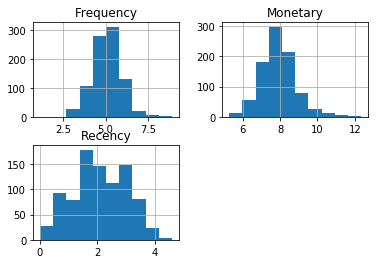

In [8]:
rfm_log.hist()
plt.show()

In [31]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,875.000000,875.000000,875.000000
mean,2.063900,5.080340,7.945183
std,0.956814,0.866925,0.962244
min,0.000000,1.098612,5.270021
25%,1.386294,4.574711,7.352864
50%,2.197225,5.087596,7.869547
75%,2.833213,5.636572,8.449068
max,4.615121,8.943898,12.353728


In [9]:
# hcluster on large customers
from sklearn.preprocessing import normalize

df_scaled = pd.DataFrame(normalize(rfm_log), columns=['Recency','Frequency','Monetary'], index=rfm_log.index)

In [10]:
df_scaled.describe()

,Recency,Frequency,Monetary
count,888.000000,888.000000,888.000000
mean,0.212839,0.521392,0.818285
std,0.091946,0.057350,0.039128
min,0.000000,0.090910,0.719872
25%,0.144249,0.493501,0.791959
50%,0.224443,0.524054,0.816146
75%,0.288235,0.556833,0.843417
max,0.400972,0.653926,0.995859


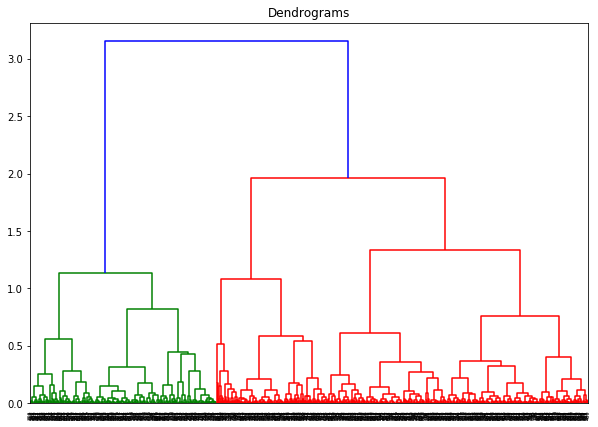

In [11]:
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = hc.dendrogram(hc.linkage(df_scaled, method='ward'))
plt.savefig("dendrogram_ward.png")

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster = model.fit_predict(df_scaled)

In [13]:
# This library is needed for 3d plots
from mpl_toolkits import mplot3d

%matplotlib inline

<Figure size 432x288 with 0 Axes>

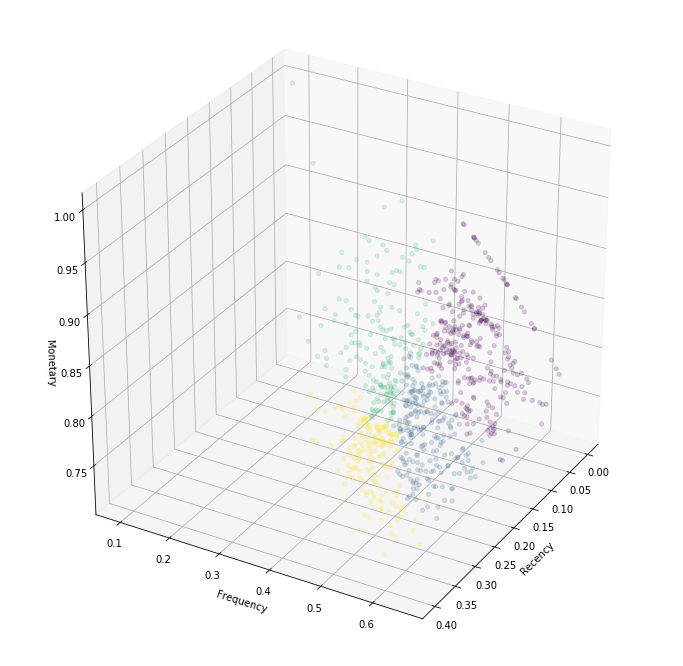

In [14]:
fig = plt.figure()
fig=plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.view_init(30, 30) # Rotate the view
ax.scatter(df_scaled.Recency, df_scaled.Frequency, df_scaled.Monetary, c=cluster, cmap='viridis', linewidth=0.5, alpha=0.2);
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca2 = pca.transform(df_scaled)

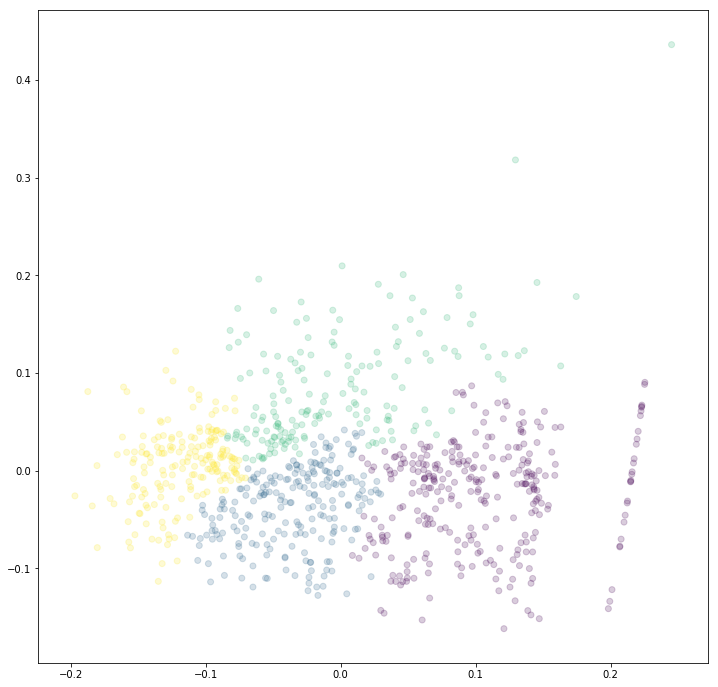

In [16]:
(x, y) = (df_pca2[:,0], df_pca2[:,1])
plt.figure(figsize=(12,12))
plt.scatter(x,y, c=cluster, alpha=0.2, cmap='viridis')
plt.show()

In [17]:
# h clustering on transactions
df['cluster'] = cluster

In [18]:
df.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12747,3,96,3837.45,0
12748,1,4051,30301.40,0
12749,4,199,4090.88,0
12820,4,59,942.34,0
12826,3,82,1319.72,0


In [19]:
df.groupby('cluster').mean()

,Recency,Frequency,Monetary
cluster,,,
0,3.225589,337.673401,6895.700269
1,11.668142,277.207965,3123.868053
2,9.531073,81.276836,7865.851243
3,28.989362,195.882979,3293.014468
